# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

## Input data

In [4]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [5]:
INPUT_FILEPATH = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [6]:
# output dir for this notebook
RESULTS_DIR = Path(conf.RESULTS["DATA_TRANSFORMATIONS_DIR"], "umap").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap')

## UMAP options

In [7]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [8]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [9]:
data = pd.read_pickle(INPUT_FILEPATH)

In [10]:
display(data.shape)

(3752, 987)

In [11]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [12]:
from data.dimreduction import get_umap_proj

In [13]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3752, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.077469,1.324987,9.246289,0.566455,4.950986
std,1.338380,0.954799,1.373883,0.726748,1.220800
min,-2.100959,-0.678076,0.553387,-1.399570,1.944821
25%,-1.005688,0.875905,8.174427,0.037172,3.844787
50%,-0.235504,1.184563,9.389521,0.609104,5.062976
75%,1.280510,1.605864,10.431409,1.088803,5.978195
max,12.176436,8.765213,12.169073,2.943302,7.486715


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3752, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.353099,8.518028,9.412169,9.889055,4.680095
std,0.862523,0.897547,0.779805,1.210296,0.488218
min,-1.206594,1.861455,1.688720,7.204007,2.872739
25%,-0.241901,8.151525,9.082130,8.907287,4.355443
50%,0.266920,8.570715,9.448767,10.059897,4.680687
75%,0.888573,9.050646,9.888482,10.902192,4.978608
max,12.182471,9.833234,10.960138,11.961166,6.202712


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3752, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.468614,1.438771,9.402191,9.752393,5.311704
std,0.607210,0.858116,0.450164,0.814816,0.331608
min,-0.110881,0.661202,1.935491,8.136925,4.290620
25%,0.363614,1.215144,9.311945,8.997893,5.144461
50%,0.452037,1.366564,9.411102,9.810908,5.288910
75%,0.543864,1.489100,9.523571,10.496004,5.499285
max,13.103206,8.936981,10.644322,11.593197,6.528035


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3752, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,9.632232,8.427155,9.589030,9.815567,4.683504
std,0.565736,0.868361,0.488426,0.602693,0.221351
min,-1.656719,1.612159,1.435933,8.424869,3.869633
25%,9.462849,8.135004,9.483202,9.333642,4.524503
50%,9.667140,8.516636,9.612083,9.860548,4.650798
75%,9.838655,8.823933,9.731814,10.316289,4.879649
max,10.234707,10.134883,10.311102,11.196234,5.453794


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3752, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.397127,1.467483,0.529447,0.196450,5.428112
std,0.586557,0.916052,0.516392,0.836488,0.279809
min,-0.050293,0.462677,-0.218506,-1.495991,4.526998
25%,0.224675,0.967169,0.332957,-0.615620,5.256843
50%,0.390842,1.418299,0.517808,0.274142,5.427138
75%,0.500702,1.785616,0.676264,0.911038,5.663013
max,12.557713,8.730224,8.325053,1.855118,6.133140


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3752, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,9.667269,8.582644,9.524095,9.668339,4.678472
std,0.568371,0.853518,0.467407,0.694791,0.130449
min,-2.043261,2.013011,1.812973,7.830413,3.994310
25%,9.544245,8.261819,9.424377,9.046152,4.609011
50%,9.650231,8.671461,9.561857,9.609067,4.679538
75%,9.848108,9.033814,9.642713,10.339871,4.747692
max,10.205195,10.047072,10.305815,10.968822,5.178999


PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [14]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [15]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

[2021-03-08 14:25:53,656 - numexpr.utils] INFO: NumExpr defaulting to 4 threads.


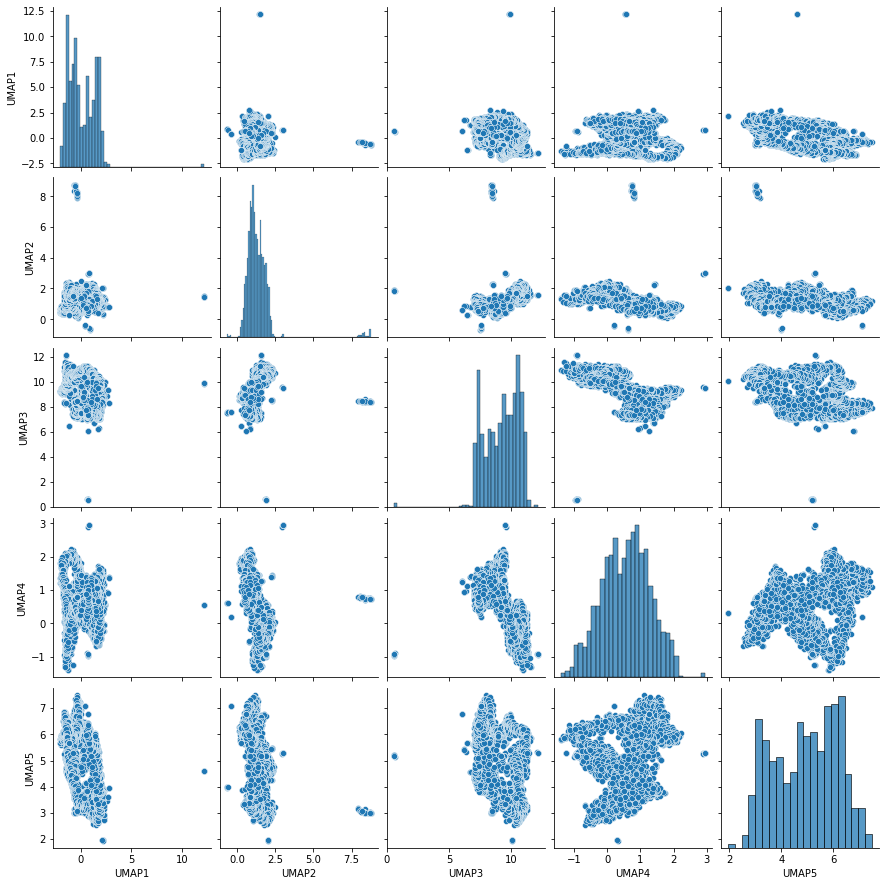

In [16]:
g = sns.pairplot(data=dr_data)

## Full plot (density)

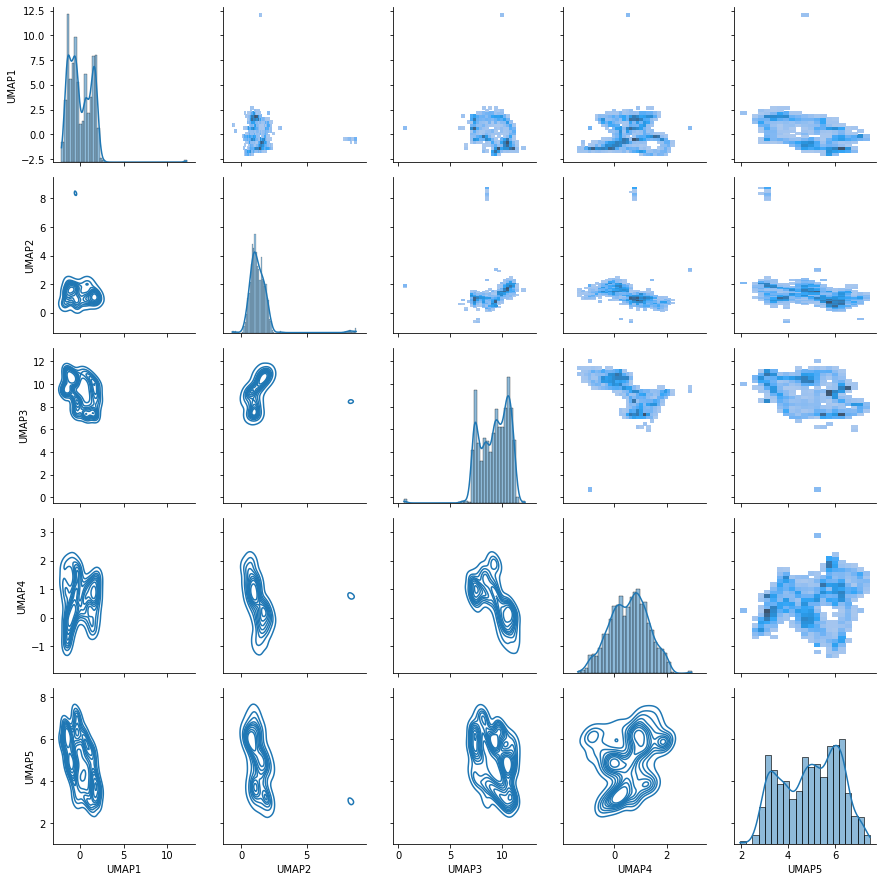

In [17]:
g = sns.PairGrid(data=dr_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)

## Density plot without "outliers"

In [18]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < 10) & (dr_data["UMAP2"] < 5)]

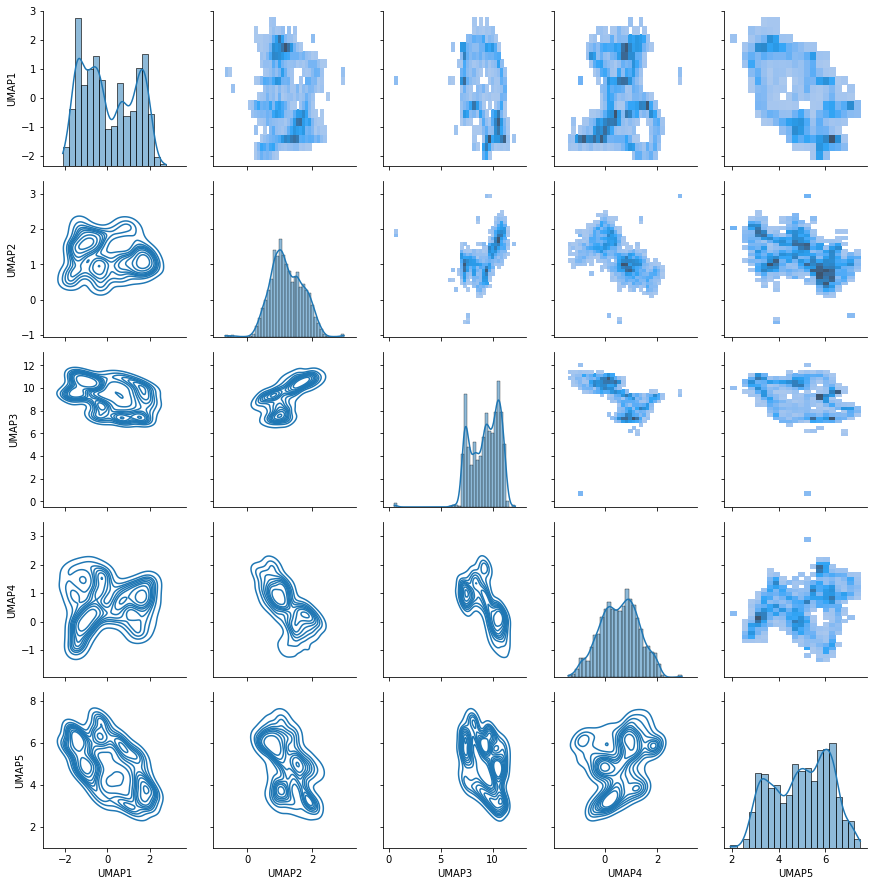

In [19]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)